# Welcome to Week 2
Last week you played with data and built models in a very practical way. This week, you will go deeper into theory and spend time on some foundational concepts.  This notebook is divided into two sections:

1. The Theory: an introduction to bias and variance - two key concepts in machine learning - and how they affect model performance
2. The Practice: a chance for you to experiment with how we deal with these concepts in practice

**You may finish the coding questions fairly quickly, but we expect you to spend most of your time teaching yourself the theoretical concepts** that come up in this notebook. We will use the 2-on-1 review session to test you on these concepts. Consequently, you should spend your time going through the below **resources** and playing with these concepts beyond this notebook.
### Resources (spend your time here!)
- [Caltech Learn from data](http://work.caltech.edu/telecourse.html ""): Seminal online course that introduces the theory of machine learning
- [Introduction to Statistical Learning](https://www-bcf.usc.edu/~gareth/ISL/ ""): Landmark textbook (and videos) on machine learning theory
- *Machine Learning* by Tom M. Mitchell: See chapters 5.2 & 5.3 (textbook available on our bookshelf)
- [Datacamp Supervised learning with scikit-learn](https://www.datacamp.com/courses/supervised-learning-with-scikit-learn ""): Practical walkthrough of some key concepts and their application
- [Understanding the Bias Variance Tradeoff](http://scott.fortmann-roe.com/docs/BiasVariance.html ""): Blog post on the topic of bias and variance
- [Kaggle Ensembling Guide](https://mlwave.com/kaggle-ensembling-guide/ ""): Ensembling guide
- [XGBoost tutorials](https://xgboost.readthedocs.io/en/latest/tutorials/model.html ""): XGBoost guide

### Collaboration Policy

Collaboration is the best way to learn. Try everything yourself first, then discuss your method with your teammates. Do not directly copy their code, unless you are trying to learn a programming technique. Do your own thinking and write your own code.

If you believe referring to someone's answer is the best way to learn, we recommend looking at the code, then walking away for a few minutes, and come back to write your own version of the code. There will be minimum policing, but we will check for direct copying of code.

Please list your collaborators:

1. Tupac Shakur
2. ???

### Imports
This section should be reserved for packages/libraries you that you would normally use (you can add models/functions/libraries as you go along)

In [2]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset

Begin by loading the Boston House Prices dataset, or simply the Boston dataset, for our exploration. <br>
You can find it on Kaggle, or simply import it from the scikit-learn build-in datasets.

In [3]:
boston=pd.read_csv('data/train.csv')

# The Theoretical Side

In the first week, you learned about how to use some supervised learning algorithms. In this second week, we will go slightly deeper, to appreciate why machine learning works. We still stay in the realm of supervised learning, but many of the concepts learned here are applicable to general machine learning.

# 1. Model Complexity

We want to demonstrate the impact of implementing complicated models. <br> __Explore the dataset and choose one variable that you think can be most predictive of the target variable (price) in the Boston dataset.__ <br> (Please provide justification to the variable you chose in writing).

- From the heatmap, lmstat has the highest correlation to medv(price).
- We can use choose this variable.

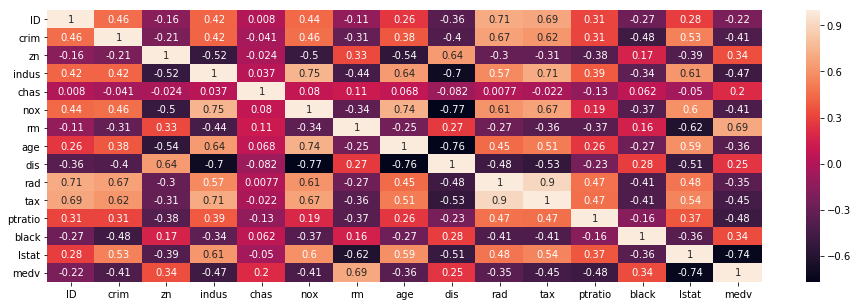

In [4]:
plt.figure(figsize = (16,5))
sns.heatmap(boston.corr(),annot=True)

In [5]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


_(Provide your verbal answer here)_

In [6]:
X=boston['lstat'].values
X = X.reshape(-1, 1)
y=boston['medv'].values
y = y.reshape(-1, 1)

__Create a linear regression model, and try to predict the price based on the parameter you chose:__

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)   
y_pred=lr.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

# # The coefficients
print('Coefficients: \n', lr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('R^2: %.2f' % r2_score(y_test,y_pred))

Coefficients: 
 [[-0.95065288]]
Mean squared error: 37.14
Variance score: 0.56


__Extract the coefficients or weights of the linear model interpret what they mean.__ <br> Make sure you visualise the linear regression line and comment on how the line fits the data.

- lstat(lower status of the population (percent))
- When percentage of the lower status group of folks is reduced, the median value of the homes increases. This shows a negative correlation.
- However, from our low R^2 value (0.56) compared to 1, we can conclude that the fit isnt that good

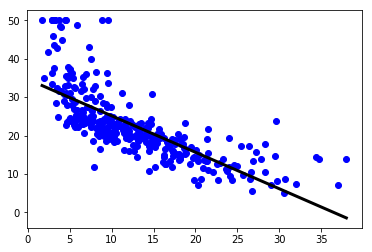

In [14]:
prediction_space = np.linspace(min(X), max(X)).reshape(-1, 1) 

plt.scatter(X, y, color='blue')
plt.plot(prediction_space, lr.predict(prediction_space), color='black', linewidth=3) 
plt.show()
#sns.lmplot(x="lstat",y="medv",data=boston)

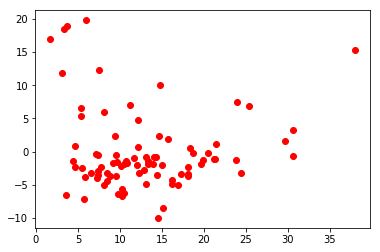

In [15]:
plt.scatter(X_test,y_test-y_pred,color='red')
plt.show()

_(Provide your verbal answer here)_

Linear regression is considered a simple model, using a polynomial model introduces a higher complexity. <br>
__Find and implement two more models (with medium and high complexity) to predict the target variable, using the same variable you chose for the previous part__ (Be sure to visualize your result and comment about the fit).

Fit and plot your medium complexity model here:

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X)

# from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_,y,random_state=42)
# from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)   
y_pred=lr.predict(X_test)

# from sklearn.metrics import mean_squared_error, r2_score

# # The coefficients
print('Coefficients: \n', lr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('R^2: %.2f' % r2_score(y_test,y_pred))


Coefficients: 
 [[ 0.         -2.3092053   0.04312653]]
Mean squared error: 28.27
Variance score: 0.67


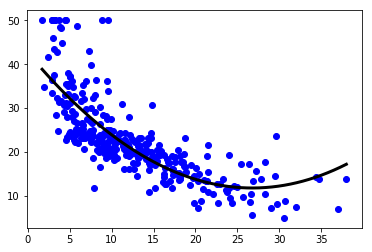

In [20]:
prediction_space = np.linspace(min(X), max(X)).reshape(-1, 1) 
prediction_space_order2=poly.fit_transform(prediction_space)

plt.scatter(X, y, color='blue')
plt.plot(prediction_space, lr.predict(prediction_space_order2), color='black', linewidth=3) 
plt.show()

Fit and plot your high complexity model here:

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X_ = poly.fit_transform(X)


# from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_,y,random_state=42)
# from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)   
y_pred=lr.predict(X_test)

# from sklearn.metrics import mean_squared_error, r2_score

# # The coefficients
print('Coefficients: \n', lr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('R^2: %.2f' % r2_score(y_test,y_pred))


Coefficients: 
 [[ 0.00000000e+00 -3.71109473e+00  1.39984994e-01 -1.85775667e-03]]
Mean squared error: 27.06
Variance score: 0.68


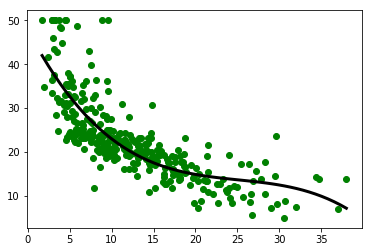

In [22]:
prediction_space = np.linspace(min(X), max(X)).reshape(-1, 1) 
prediction_space_order3=poly.fit_transform(prediction_space)

plt.scatter(X, y, color='green')
plt.plot(prediction_space, lr.predict(prediction_space_order3), color='black', linewidth=3) 
plt.show()

Use the following section to answer: which of the models has the best fit and why?

_(Provide your answer here)_

__Find a quantitative way of measuring the model fit__ <br>
Calculate it for each one of the models and compare the results to your visual inspection interpretation:

- R^2 square value is a good quantitative way of measuring model fitness.
- Increasing the order, increases the R^2 value (meaning that more of the variance of the data is captured)


If you did the exercise right, you should see the viaual and quantative fit increase in the same direction as the model complexity. 


##### But is fitness a good measure of a model?
In order to put this question to the test, __perform a cross-validation test for the three models and compare between them:__

In [58]:
for order in range(1,4):
    for k in range(5,20,5):
        poly = PolynomialFeatures(degree=order)
        X_ = poly.fit_transform(X)
        X_train,X_test,y_train,y_test=train_test_split(X_,y,random_state=42)
        from sklearn.linear_model import LinearRegression
        lr=LinearRegression()
        from sklearn.model_selection import cross_val_score
        cv_results=cross_val_score(lr,X_,y,cv=k,scoring='neg_mean_squared_error')
        print("Polynomial Order: %d, K-Fold: %d => Mean Squared Error: %d." %(order,k,cv_results.mean()))



Polynomial Order: 1, K-Fold: 5 => Mean Squared Error: -43.
Polynomial Order: 1, K-Fold: 10 => Mean Squared Error: -41.
Polynomial Order: 1, K-Fold: 15 => Mean Squared Error: -40.
Polynomial Order: 2, K-Fold: 5 => Mean Squared Error: -34.
Polynomial Order: 2, K-Fold: 10 => Mean Squared Error: -33.
Polynomial Order: 2, K-Fold: 15 => Mean Squared Error: -32.
Polynomial Order: 3, K-Fold: 5 => Mean Squared Error: -32.
Polynomial Order: 3, K-Fold: 10 => Mean Squared Error: -32.
Polynomial Order: 3, K-Fold: 15 => Mean Squared Error: -31.


What measure did you use to compare between the models and why? <br>
Which one fits the data the best? Explain that result

- Used Mean Squared Error (This measures how far the predicted points were from the actual points)
 - It is negative due to some sklearn convention
 
- Polynomial Order 3 best fits the data, but it doesnt have much difference from Order 2, upon performing cross validation

Let's try to extend this discussion by including all the remaining variables in the Boston dataset. <br> __Fit the three models, use _all_ the variables in the Boston dataset and compare their cross validation scores.__ <br> See if you observe the same patterns as when using one variable.

In [78]:
X=boston.drop(['medv'],axis='columns')
y=boston[['medv']]

for order in range(1,4):
    for k in range(5,20,5):
        poly = PolynomialFeatures(degree=order)
        X_ = poly.fit_transform(X)
        X_train,X_test,y_train,y_test=train_test_split(X_,y,random_state=21)
        from sklearn.linear_model import LinearRegression
        lr=LinearRegression()
        from sklearn.model_selection import cross_val_score
        cv_results=cross_val_score(lr,X_,y,cv=k,scoring='neg_mean_squared_error')
        print("Polynomial Order: %d, K-Fold: %d => Mean Squared Error: %d." %(order,k,cv_results.mean()))



Polynomial Order: 1, K-Fold: 5 => Mean Squared Error: -50.
Polynomial Order: 1, K-Fold: 10 => Mean Squared Error: -43.
Polynomial Order: 1, K-Fold: 15 => Mean Squared Error: -31.
Polynomial Order: 2, K-Fold: 5 => Mean Squared Error: -11324.
Polynomial Order: 2, K-Fold: 10 => Mean Squared Error: -315.
Polynomial Order: 2, K-Fold: 15 => Mean Squared Error: -241.
Polynomial Order: 3, K-Fold: 5 => Mean Squared Error: -365186.
Polynomial Order: 3, K-Fold: 10 => Mean Squared Error: -241880.
Polynomial Order: 3, K-Fold: 15 => Mean Squared Error: -164642.


- For each model, explain the differences you encountered when expanding the dataset.<br>
- Compare the current result between models and try to explain it.

1. For polynomial order 1
 - Adding more variables, didnt change the mean squared error much. 
2. For polynomial order 2,
 - Adding more variables, increased the mean square error a bit. Compared to single variable model, this performs more badly than order 1.
3. For polynomial order 3,
 - Adding more variables, increased the mean square error drastically, implying that this model is overfitting too much the training data.


_(Provide your answer here)_

- Using the meaned squared error metric, for the single variable, visually it was following a cubic function, so increasing the complexity helped to reduce the error.
- However, when all variables are added, it becomes impossible to visualise the underlying function. So using the MSE, we can check whether increasing the complexity neccesarity increases the model fit.

_(Provide your answer here)_

__Expending our discussion on model complexity, comment below how one can decrease/increase complexity in the following families of algorithms:__ 
- Decision tree 
- Artificial neural network 
- Support vector machine
- K-nearest neighbour
- Bayesian method (optional)

_(Provide your answer here)_

__These are the factors which decides their complexity.___

- Decision Tree
    - Height of a tree.
- Artificial neural network
    - Number of nodes and number of layers.
- Support Vector Machine
    - Highly complex kernal function 
- K-Nearest Neighhour
    - Decreasing the number of K neighbours.
- Bayesian Method
    - __TODO__

__Provide the best explanation/definition (using your own words) of over/under-fitting:__

_(Provide your answer here)_

[Overfitting vs Underfitting](https://chemicalstatistician.wordpress.com/2014/03/19/machine-learning-lesson-of-the-day-overfitting-and-underfitting/)

- Overfitting
    - In this case, it tends to follow all the points (even noise), thus will give high training accuracy. However, since it doesnt capture the underlying relationships, performs badly in new data
    
- Underfitting
    - Too simple a model, generalises the undelying relationships, thus the error remains somewhat constant when using different datasets.

# 2. Bias Variance Trade-Off

One might claim machine learning is about balancing. If that's the case, what measure can we use to find the right balance? 

From a more theoretical perspective, two useful measures are bias and variance.<br>
In an intuitive sense, __bias__ is how off-the-mark our prediction/estimate tends to be with respect to the true value we are trying to predict. Usually we get bias because of inherent limitation in the model/algorithm we choose, for example linear regression is limited only to fit linear patterns, and hence "biased" towards linearity. <br>
__Variance__ is how flexible the predictions made by the model can be to fit more complicated patterns in data. Highly complex models tend to have high variance. This comes as a cost; as flexibility increases, the sensitivity of the models to the training data that they try to fit increases, resulting in the predictions being more distributed away from the true values. 

__This is just the tip of the iceberg, we encourage you to pause your work on the notebook for now and seek more information about the relationship to get a better understanding before we dive in.__

Bias and variance is a trade-off, increasing one decreases the other.<br> __Provide an explanation to why this is so:__


_(Provide your answer here)_


__Provide mathematical formulas for the bias, the variance and the overall prediction error of a model:__

Shifting our focus to a more practical approach, we will now try and demonstrate how to find the right balance between bias variance when fitting a model. 

__Define a high order polynomial curve to fit:__ <br>
(One example is: $f(x)=0.2x^{5}-3.5x^{4}+21x^{3}-53x^{2}+37x+0.6$ (you are free to define another function)

In [95]:
x=np.arange(1,7,0.1)
fx=0.2*x**5-3.5*x**4+21*x**3-53*x**2+37*x+0.6

Plot the function you created:

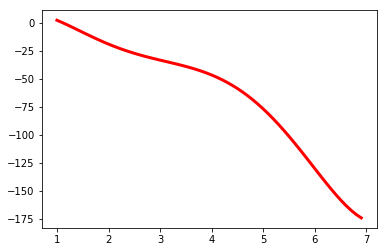

In [96]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(x,fx,color='red',linewidth=3)
plt.show()

Our goal is to estimate this function using polynomial regression. In real-life cases, the true function is not accessible to us, only noisy estimates around it.

__Now, simulate a training data by introducing random errors on the curve.__<br>The training data should look like the figure below (make sure you have at least a 1000 observations).

<img src="./training_data.png">

Spare a few hundreds samples to use as the validation set (and plot it):

Using the remaining data, build 500 linear regression models, each by randomly sampling 80 observations from the pool:

__Calculate the bias square and variance of linear regression by predicting (using the 500 models) the values of the validation set above, and comparing them against the true values from the polynomial curve defined earlier.__ <br> (refer to the bias variance formula to do the calculation)

Repeat the whole procedure of calculating bias variance, but this time using polynomial of degrees 2, 3, 4, ..., 15

Plot the bias and variance (as y) vs. the model complexity/polynomial degree (as x)

Where is the optimal balance point? Which polynomial degree is that? <br>
Find out more and elaborate on the meaning and importance that point of balance.

_(Provide your answer here)_

# The Practical Side 

Bias-variance trade-off is one of the most critical components of model tuning. You will need to find the right point in terms of model complexity to derive the best results for your model.

In practice, however, it is impossible to calculate bias and variance for an actual dataset. Try to explain why this is impossible below:

_(Provide your answer here)_

Repeat the procedure you used to calculate bias-variance above, but this time calculate mean squared error instead. <br> Overlay the MSE on the bias variance plot earlier and comment on the observation.

_(Provide your answer here)_

# 3. Out-of-sample Validation

Hence, we will go back to using mean squared errors (MSE) to tune our models. In reality, validation error is the most reliable source of information you can get, provided you do validation properly. You might have realised that MSE scores are negative when you put them through the `cross_val_score` method - do think about why this is so as well.

If you would like to do any data exploration, you can do them here.

We will begin by building simple baseline models for our dataset. We will start with 3 baseline models: linear regression, k-nearest neighbours and decision trees. Build a simple regression model for each of them. Evaluate and report their performance, and identify the best model by preliminary performance.

## 3.1 Linear Regression

## 3.2 K-Nearest Neighbours

## 3.3 Decision Tree

## Theoretical Considerations

How do we ensure that our models are reliably evaluated? Specifically, in the area of out-of-sample validation, how do we decide to use `train_test_split` vs `cross_val_score`?

Given that the dataset has only ~500 rows of data, what are the challenges we face, and how can we best mitigate these issues?

# 4. Hyperparameter exploration

We will now start to look at hyperparameters for these models. Considering between the 3 models, k-nearest neighbours probably has the least hyperparameters to tune, and is also the simplest computationally. Hence, let's start with k-nearest neighbours. You might not want to try all of these parameters, considering limited time. This is a good time to do some research with respect to what parameters to optimise.

When conducting a parameter search, the idea of grid search immediately comes to mind. Why do we usually use grid search, and in what situations should we use other search options?

Why do we not use gradient descent to identify the right parameters?

## 4.1 KNN

In [ ]:
neighbors.KNeighborsRegressor().get_params()

Apart from the `n_neighbors` and `n_jobs` parameters, pick out 1-2 more which you are unfamiliar with and do some research. Explain what they do with language intended for a lay person. You may also wish to spend some time thinking about how you might want to implement such a model algorithmically.

## 4.2 Decision Trees

Now we can proceed to a more complicated model, try to tune the hyperparameter of a decision tree regressor.

In [ ]:
tree.DecisionTreeRegressor().get_params()

The linear model also requires tuning, but the current API we are using (linear_model.LinearRegression) is relatively weak and lacks the parameters we are looking for. Instead, we will work with elastic nets, and go beyond linear model complexity to build a better linear regression model. We will look at this in detail in the next session.

# 5. Feature Selection

We will begin by taking the model beyond linearity. In statistical languages more tuned towards modelling like R, we introduce polynomial features/covariates through a parameter within the model, as such:  

`lr = lm(y ~ poly(X, 3))`  

However, in the context of sklearn, the `LinearRegression` class solely focuses on optimising a set of regression coefficients for you, and does not look at coefficients. We will need to use modules from `sklearn.preprocessing` to help us develop polynomial features.

To start off, develop sets of polynomials features to different degrees. It is up to you to decide what power to raise for the features, but keep it mind that high numbers put additional strain on your machine at an exponential rate, so be mindful of what your machine is capable of.

## 5.1 RFE Feature Selection

One way of working with a large quantity of features is by using the Recursive Feature Elimination (RFE) algorithm. The name may provide us with a hint of what it does, but do explain ,with the language for a layperson, what RFE is doing and how it is executed algorithmically. Then, run the code to execute the model.

Fit a linear regression on the model. How can we go beyond the final variables remaining in RFE to further improve the performance of the model?

Consider the drawbacks of RFE, and explain them below:

## 5.2 Regularisation

Another method to reduce model complexity is through regularisation. Regularisation is the idea of penalising large weights as part of the model fitting process, and forcing the model to trade-off between large weights and model accuracy.

In your own words, explain why forcing the model to not adapt large weights can somehow help with feature selection and model fitting in general. How does the algorithm help the model to learn to recognise the best set of weights with a regularisation term?

Build a L1 regression model through feature selection by regularisation. Tune your model to achieve optimal results.

Repeat this process for a elastic net model.

Consider the differences between each type of regression - in this case, which is a superior model to use?

For ease of use, build pipelines using `sklearn.pipeline` so that these models can be better consumed later for meta-model ensembling.

How do RFE and regularisation-based models compare? Think about the strengths and weaknesses of regularisation, as compared to RFE.

# 6. Ensemble methods

Ensembling is the process of combining prediction models to improve overall performence. In this section, we'll look at various ways this can be done to achieve better resultings.

## 6.1 Bagging

The term "bag" is the abbreviation for "bootstrap aggregation", in which we build a boostrap for a dataset, then train a model for each dataset we produce, after which we aggregate the score. If you are not yet familiar with any of these concepts, do some research and appreciate the process. We will not go into detail here as we already have done that last week.

Using your tuned Decision Tree model from a previous section as the base model, implement and tune a model with bagging technique. Compare this result with a random forest model built from scratch.

## 6.2 Boosting

Boosting, as explained earlier this week, uses an aggregation of weak learners to reduce the total variance. It operates on a single model sequentially. At each iteration, it tries to rectify the errors made in the previous iteration.

a) Explain the term "weak learner".  
b) Explain how adaptive boosting (AdaBoost) and gradient boosting (GBM) work and highlight their differences.

Perform AdaBoost and Gradient Boosting on Boston, and compare the accuracies. Comment on the performances as well.

In practice, we use an XGBoost (eXtreme Gradient Boosting) model, which outperforms typical boosting models due to its ability to be parallelized AND having the appropriate tunable regularisation and tree parameters. Try reading up the documentation on `xgboost` and tune an `xgboost model`.

## 6.3 Stacking

Finally, stacking helps us bring all the models we have done from all the past attempts into one big model. Before this, we have been evaluating models at an individual level. How can we best bring the performance of all these models together, into one even stronger model?

One such approach is stacking. Stacking is building a meta-level model that can take the results of each model, and combine them in an appropriate manner to create a even stronger model. Stacking-based meta-models have seen [success on modelling competitions](https://blogs.sas.com/content/subconsciousmusings/2017/05/18/stacked-ensemble-models-win-data-science-competitions/) in recent years, due to availability of compute power to data scientists.

Build a linear regression meta model stacking on top of all the models you've built so far. Report on your accuracy - this is the final accuracy we are looking at.

We can observe that the minimum MSE corresponds to the point where the balance between bias and variance is met. MSE is accessible by us. This is the reason why cross-validation and outsample test methods used in Week 1 can be used not only for validation, but also for us to tune our model complexity. In the following sections, we will explore how we use them to guide model selection, hyperparameter tuning, regularisation and ensemble methods; all to get the best generalisation capability possible (i.e. the balancing act).

# Congratulations! 
### You have reached the end of our notebook :)
#### Now what?
If you still have time and you're considering what would be the best use of it, <br>
please continue and try your luck with the next (and optional) section of the notebook.<br>
Alternatively, if you have yet to completed the previous notebook, or if there are parts you wish to go back to and revisit/revise/tune or read up more about, feel free to do so...

<img src="./Fireworks.jpg">

# 7. Other directions (Optional)

1. Try and repeat the notebook's process, only this time use classification models/problem instead of regression.
2. Bias-variance is only one means of model profiling we looked into in this notebookt. Try to research and look into  other measures of model profiling, i.e. by vc dimension, induction bias, empirical risk minimisation.
